# Various Naive Bayes Classifers on Iris Dataset

## Gaussian NB, Bernouili NB and Multinomial NB implementation

## Libray Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

## Load the dataset and preliminary validations

In [2]:
# Set the column names for the dataset
column_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

# Read the data from .data file of UCI and set the column names as per the list above
iris = pd.read_csv("resources/iris.data", names=column_names)

In [3]:
# Verify the data load

iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Check for any missing values
iris.isna().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

The iris dataset has no missing values

In [5]:
# Check the data structure
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The dataset has 150 entries in total spread across three types of classes and all attributes are numeric in nature

In [6]:
# Check the summary statistics of the dataset
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

Frequency Distribution of the Class Variable


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64

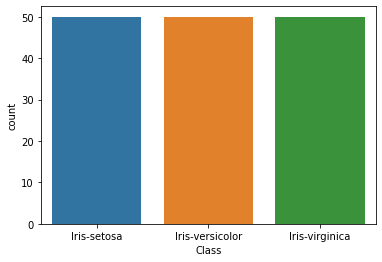

In [7]:
# Let us explore the response variable class

sns.countplot(x='Class', data=iris)

print(f"Frequency Distribution of the Class Variable")
iris['Class'].value_counts()

This is a balanced class distribution and we have equal number of instances of all three different types of classes

**We will explore joint plot between the attributes by the Class variable and infer any observation which is evident**

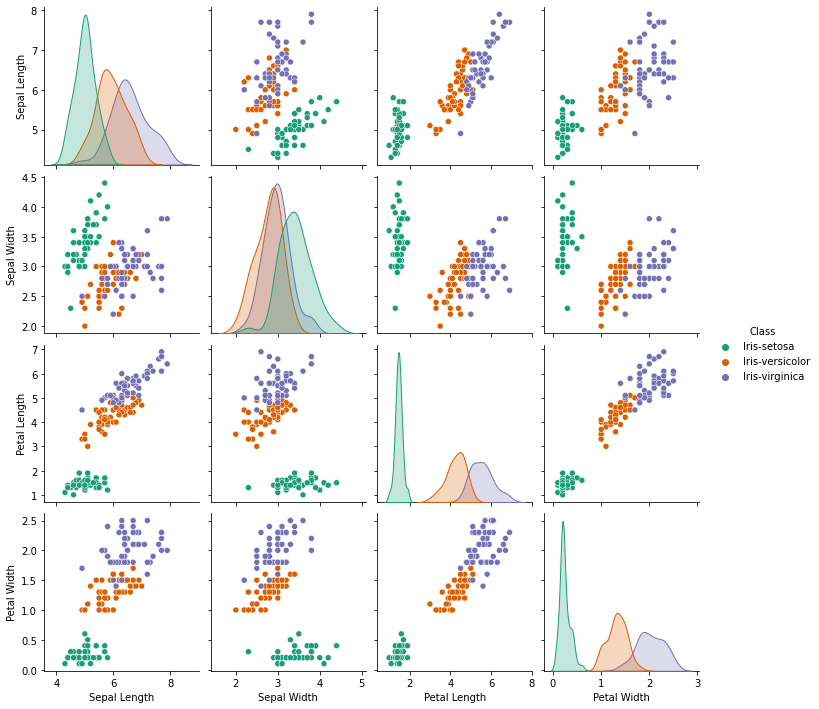

In [8]:
sns.pairplot(iris, hue='Class', palette='Dark2');

Few important observations which is evident from the visualization above

**1. Iris-setosa is clearly differentiated from the rest of the other two varieties - Iris-versicolor, Iris-virginica**<br>
**2. Iris-versicolor is also differentiated with Iris-virginica in the areas of Petal Length and Petal Width with a very marginal overlap in their measurements**<br>
**3. Only in case of Sepal Length and Sepal Width, Iris-versicolor and Iris-virginica seems to have a minimal overlap**

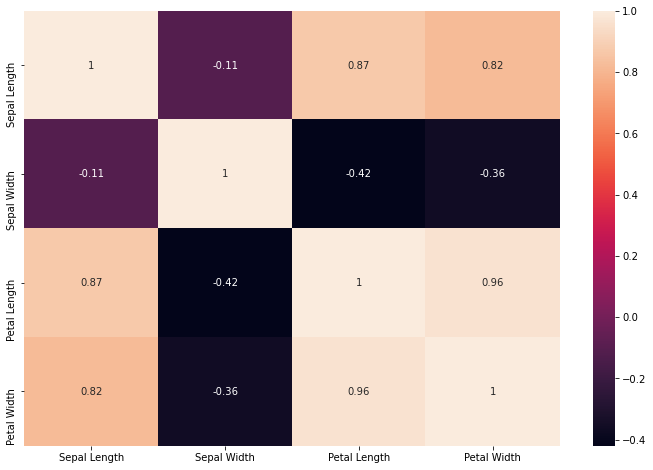

In [9]:
plt.subplots(figsize = (12,8))
sns.heatmap(iris.corr(),annot=True)
plt.show()

**Observation**

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

## Seggregate features and target variable and perform a train, test split

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

features = iris.drop('Class', axis=1)
target = iris['Class']

le = LabelEncoder()
target = le.fit_transform(target)

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                           test_size=0.3, random_state=101)

## GaussianNB

### Train the Model

In [11]:
from sklearn.naive_bayes import GaussianNB

gaussianNBClassifier = GaussianNB()
gaussianNBClassifier.fit(features_train, target_train)

GaussianNB()

### Make the predictions and Validating the predictions

In [12]:
predictionsGaussianNB = gaussianNBClassifier.predict(features_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix - GaussianNB")
print(confusion_matrix(target_test, predictionsGaussianNB))
print("\n")
print("Accuracy Score - GaussianNB")
print(accuracy_score(target_test, predictionsGaussianNB))
print("\n")
print("Classification Report - GaussianNB")
print(classification_report(target_test, predictionsGaussianNB))

Confusion Matrix - GaussianNB
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


Accuracy Score - GaussianNB
0.9555555555555556


Classification Report - GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## BernoulliNB

### Initialize and Train the model

In [14]:
from sklearn.naive_bayes import BernoulliNB

bernoulliNBClassifier = BernoulliNB()
bernoulliNBClassifier.fit(features_train, target_train)

BernoulliNB()

### Make the predictions and Validating the predictions

In [15]:
predictionsBernoulliNB = bernoulliNBClassifier.predict(features_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix - BernoulliNB")
print(confusion_matrix(target_test, predictionsBernoulliNB))
print("\n")
print("Accuracy Score - BernoulliNB")
print(accuracy_score(target_test, predictionsBernoulliNB))
print("\n")
print("Classification Report - BernoulliNB")
print(classification_report(target_test, predictionsBernoulliNB))

Confusion Matrix - BernoulliNB
[[ 0  0 13]
 [ 0  0 20]
 [ 0  0 12]]


Accuracy Score - BernoulliNB
0.26666666666666666


Classification Report - BernoulliNB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        20
           2       0.27      1.00      0.42        12

    accuracy                           0.27        45
   macro avg       0.09      0.33      0.14        45
weighted avg       0.07      0.27      0.11        45



## MultinomialNB

### Initialize and Train the model

In [17]:
from sklearn.naive_bayes import MultinomialNB

multinomialNBClassifier = MultinomialNB()
multinomialNBClassifier.fit(features_train, target_train)

MultinomialNB()

### Make the predictions and Validating the predictions

In [18]:
predictionsMultinomialNB = multinomialNBClassifier.predict(features_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix - MultinomialNB")
print(confusion_matrix(target_test, predictionsMultinomialNB))
print("\n")
print("Accuracy Score - MultinomialNB")
print(accuracy_score(target_test, predictionsMultinomialNB))
print("\n")
print("Classification Report - MultinomialNB")
print(classification_report(target_test, predictionsMultinomialNB))

Confusion Matrix - MultinomialNB
[[13  0  0]
 [ 0  0 20]
 [ 0  0 12]]


Accuracy Score - MultinomialNB
0.5555555555555556


Classification Report - MultinomialNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        20
           2       0.38      1.00      0.55        12

    accuracy                           0.56        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.39      0.56      0.43        45



## Plotting the decision Boundaries for all three implementation

We will define a function to plot the decision boundaries. This will use just the first two columns of the data for fitting the model as we need to find the predicted value for every point in scatter plot. There are four attributes in the dataset and we cannot plot for all four together

In [20]:
def plot_decision_boundaries(features, target, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn estimator class 
            **model_params: Model parameters to be passed on to the ML estimator
    """
    
    try:
        X = np.array(features)
        y = np.array(target).flatten()
    except:
        print("Conversion to NumPy arrays failed")
    
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. 
    h = .02    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    
    # We will create Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel(features.columns[0], fontsize=12)
    plt.ylabel(features.columns[1], fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

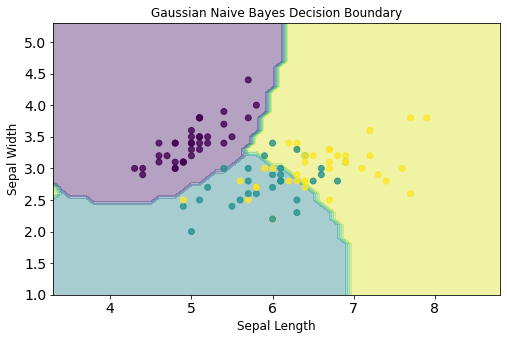

In [21]:
plt.figure(figsize=(8, 5))
plt.title("Gaussian Naive Bayes Decision Boundary")
plot_decision_boundaries(features_train, target_train, GaussianNB)
plt.show()

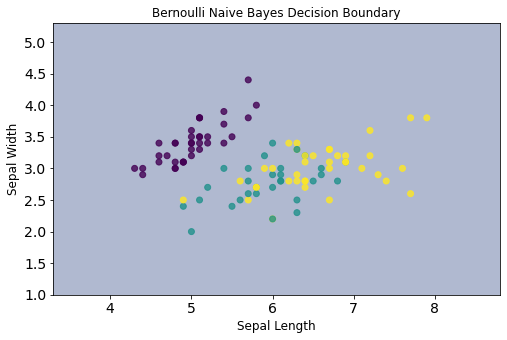

In [22]:
plt.figure(figsize=(8, 5))
plt.title("Bernoulli Naive Bayes Decision Boundary")
plot_decision_boundaries(features_train, target_train, BernoulliNB)
plt.show()

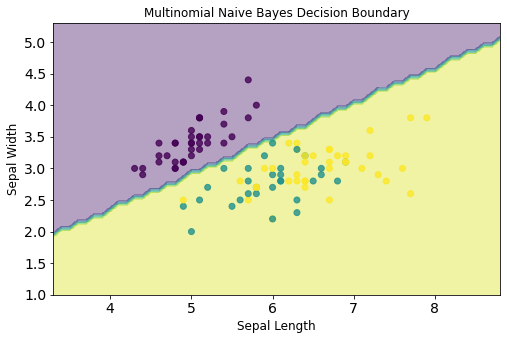

In [23]:
plt.figure(figsize=(8, 5))
plt.title("Multinomial Naive Bayes Decision Boundary")
plot_decision_boundaries(features_train, target_train, MultinomialNB)
plt.show()

## Conclusion

- **Gaussian Naive Bayes** worked best in seggregating all the three classes. Setosa was seggregated perfectly and the only missclassification was between the versicolor and virgnica where we observed a certain degree of overlap during our data exploratory analysis<br><br>

- **Gaussian Naive Bayes** provides the best and highest accuracy amongst all three. Gaussian Naive Bayes is used in cases when all our features are continuous. In our iris dataset, the feature attributes are continuous and hence Gaussian NB is more appropriate in this scenario. The assumption is the underlying data distribution is assumed to be a Gaussian (Normal) distribution. <br><br>

- **Multinomial Naive Bayes** model counts how often a certain event occurs in the dataset and works on an assumption that attributes are discrete and each of the data element will have a certain frequency to represent. This is not a very viable assumption when we deal with continuous data and hence is not the right fit for iris dataset. We saw quite a few misclassification across all class labels <br><br>

- **Bernoulli NB** This is similar to multinomial naive bayes but instead of counting how often an event occurred, it only describes whether or not an event occurred irrespective of how many times it has occurred. It assumes that all our features are binary, which is a complete misfit for the iris dataset. Hence it performs the worst with highest misclassification amongst all three classes